# Basic Signal Processing

## 1. Introduction

So far, you have experienced many of the data type in ML/DL field.

Another kind of data is signal.

But what is signal?

[quote](https://en.wikipedia.org/wiki/Signal)
> In signal processing, a signal is a function that conveys information about a phenomenon.[1] **Any quantity that can vary over space or time can be used as a signal** to share messages between observers.[2] The IEEE Transactions on Signal Processing includes **audio, video, speech, image, sonar, and radar** as examples of signal.[3] A signal may also be defined as any **observable change in a quantity over space or time**, even if it does not carry information.[4]
>
> In nature, signals can be **actions done by an organism to alert other organisms**, ranging from the release of plant chemicals to warn nearby plants of a predator, to sounds or motions made by animals to alert other animals of food. Signaling occurs in all organisms even at cellular levels, with cell signaling. Signaling theory, in evolutionary biology, proposes that a substantial driver for evolution is the ability for animals to communicate with each other by developing ways of signaling. In human engineering, **signals are typically provided by a sensor**, and often the original form of a signal is converted to another form of energy using a transducer. For example, a microphone converts an acoustic signal to a voltage waveform, and a speaker does the reverse.[1]

[quote](https://x-engineer.org/signal/#:~:text=Mathematically%2C%20a%20signal%20is%20represented,continuous%2Dtime)
> A signal can be defined as an abstraction of any quantity that can be measured, which is function of at least one independent variable (time or space). A signal is the functional representation of a physical quantity or variable, and it contains information about the behavior of the physical quantity.
>
> Example of signals:
> 
>- electrical: voltage and current
>- mechanical: position and speed
>- hydraulic: pressure and flow

Ultimately, a signal is anything that can be represented in a function of time (*t*). Let's say we have a signal of a sine wave. 

$$ x(t) = sin( 2 \pi t + \phi) $$

where *t* is time and *$\phi$* is a pahse. *$\pi$* is a constant number of $\frac{22}{7}$.

Confuse?

Let's create this signal.

In [14]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


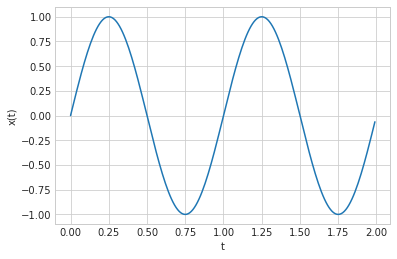

In [15]:
t = np.arange(0,2,1/100)
x = np.sin((2 * np.pi * t) + 0)

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

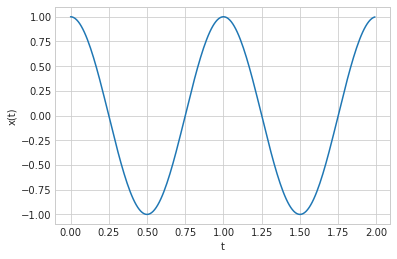

In [16]:
t = np.arange(0,2,1/100)
# Let's try a cos signal
x = np.cos((2 * np.pi * t) + 0)

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

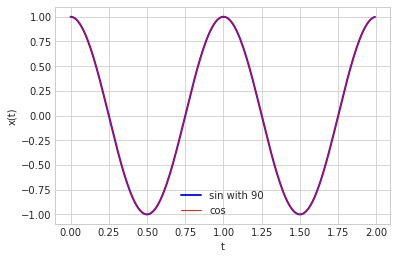

In [17]:
t = np.arange(0,2,1/100)
# Do you remember that sin + 90 degree is cos?
x_sin_90 = np.sin((2 * np.pi * t) + np.deg2rad(90))
x_cos = np.cos((2 * np.pi * t) + 0)

plt.plot(t,x_sin_90, color='blue', linestyle='-', linewidth=2, alpha=0.9, label='sin with 90')
plt.plot(t,x_cos, color='red', linestyle='-', linewidth=1, alpha=0.9, label='cos')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

"Ok. I got it. Signal is a wave. Go on."

No, wave is a subset of signal. Before we proceed, let's recall what is wave.

[quote](https://en.wikipedia.org/wiki/Wave)
> In physics, mathematics, and related fields, a wave is a propagating dynamic disturbance (change from equilibrium) of one or more quantities. **Waves can be periodic**, in which case those quantities oscillate repeatedly about an equilibrium (resting) value at some frequency. When the entire waveform moves in one direction, it is said to be a traveling wave; by contrast, a pair of superimposed periodic waves traveling in opposite directions makes a standing wave. In a standing wave, the amplitude of vibration has nulls at some positions where the wave amplitude appears smaller or even zero. Waves are often described by a wave equation (standing wave field of two opposite waves) or a one-way wave equation for single wave propagation in a defined direction.

The key of wave is it is periodic or predictable. When we observe a wave, we observe its oscillation, a.k.a. frequency.

The equation to the frequency is 

$$ f = \frac{1}{T}$$

Where *f* is frequency and $T$ is period.

Period is the time used in 1 cycle.

In another sense, a freqency is

$$ f = \frac{N}{t} $$

Where *N* is a number of cycles and *t* is time.

To fully understand this, let's draw an arbitrary sine wave and layout its properties.

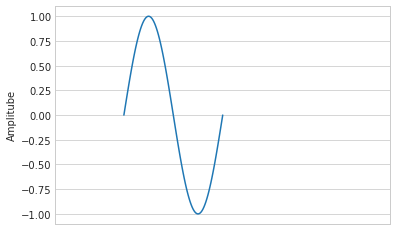

In [18]:
t = np.arange(0,1 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xticks([])
plt.xlim(0,2)
plt.show()

Above is one cycle of sine wave (or cosine with phase of -90 degree). If we repeat this exact shape, it will be two cycles of sine wave.

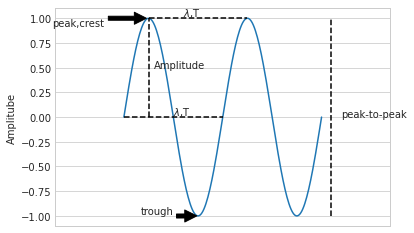

In [19]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.plot([0.25,0.25],[0,1], color='black', linestyle="--")
plt.text(0.3,0.5,'Amplitude')
plt.hlines(y=0,xmin=0,xmax=1, color="black", linestyle="--")
plt.text(0.5,0.02,r'$\lambda$,T')
plt.hlines(y=1,xmin=0.25,xmax=1.25, color="black", linestyle="--")
plt.text(0.6,1.02,r'$\lambda$,T')

plt.vlines(x=2.1,ymin=-1,ymax=1, color="black", linestyle="--")
plt.text(2.2,0,r'peak-to-peak')

plt.annotate('peak,crest',xy=(0.25,1),
            xytext=(-0.2,1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
)
plt.annotate('trough',xy=(0.75,-1),
            xytext=(0.5,-0.9),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
)
plt.xticks([])
plt.show()

The $\lambda$ (lambda) is wavelength. Conveniently, both period (*T*) and wavelength ($\lambda$) are measured at the same places. 

Now that we have established the common term of a wave, let summarized.

- **Amplitude**: measure from the mean to the **crest** or **trough**. This value is also called **peak**.
- **peak-to-peak**: the difference between the maximum positive and the maximum negative amplitudes.
- **Period (*T*)**: The time that the wave used to complete 1 cycle. (Unit is second)
- **Wavelenght ($\lambda$)**: The space/distance the wave used to complete 1 cycle. (Unit is meter)
- **Frequncy (*f*)**: How many times the wave repeated in 1 second. The usual formula is $ f = \frac{1}{T}$. Unit is Hz (Hertz).

To find the frequency (*f*), the subject wave must be drawn in time domain or, in other words, the x-axis has to be time.

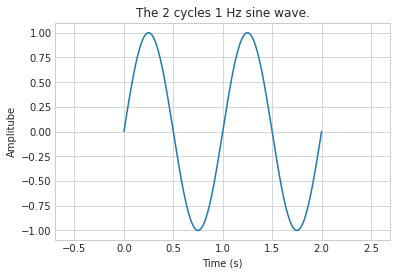

In [20]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.title("The 2 cycles 1 Hz sine wave.")
plt.xlabel('Time (s)')
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.show()

Now that we specify the x-axis as a time axis with unit of second. The wave we are looking at has a frequency of 1 Hz.

Why does the unit matter? It is because if we change the time unit from second to millisecond, the frequency now is 1000 Hz.

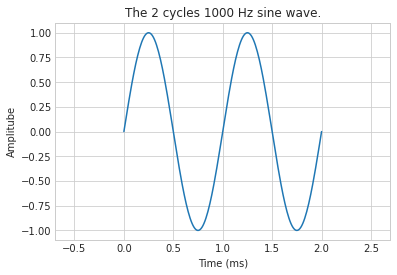

In [21]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.title("The 2 cycles 1000 Hz sine wave.")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.show()

If you are confused, here is the converted/scaled version of the wave. 

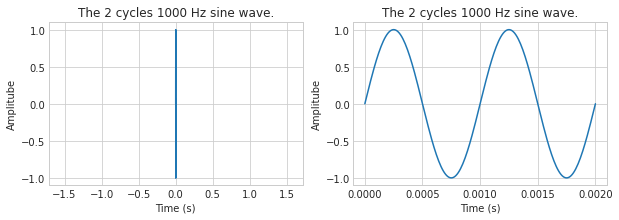

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 
t = np.arange(0,2 + 1/100,1/100) / 1000
x_sin = np.sin((2 * np.pi * t * 1000) + 0)

# Plot the exact same waves but with/without zoom
ax[0].plot(t,x_sin)
ax[0].set_title("The 2 cycles 1000 Hz sine wave.")
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitube')
ax[0].axis('equal')

ax[1].plot(t,x_sin)
ax[1].set_title("The 2 cycles 1000 Hz sine wave.")
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitube')

plt.show()

## 2. Representing as wave

The shape we plotted so far is a sine wave, but what does it mean exactly? 

Observed the below GIF.

![alt](https://c.tenor.com/ZDQm6tcyVooAAAAC/simple-pendulum-pendulum.gif)

It is a GIF of a pendulum while it swings. Obviously, in the ideal world, the pendulum will swing from left to right and right to left forever because it never loses the power. Thus, the pendulum motion is predictable. We know from high school that the time it takes to swing from left to right and right to left is the same, and we know that the distance of the swing from left to right and right to left is the same. 

Now, if we want to capture the motion of this pendulum by attaching the pencil at the bottom of the pendulum and a paper below the pendulum (this won't work in the real world). We swing the pendulum and the pencil will record the motion. We start from holding the pendulum to the right and release it. This is what we get.

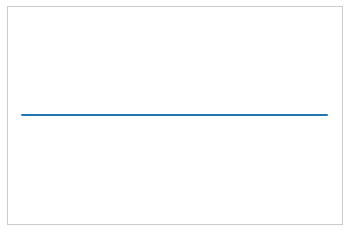

In [23]:
t = np.arange(0,2 + 1/100,1/100)
pendulum_motion = np.cos((2 * np.pi * t) + 0)
plt.plot(pendulum_motion, np.zeros(len(pendulum_motion)))
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()

Oh! In order to make this work, we have to move the paper in or out (perpendicular to the pendulum movement) at the constant speed.
Let's try again.

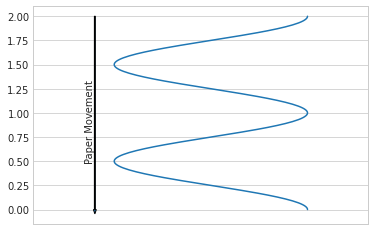

In [24]:
t = np.arange(0,2 + 1/100,1/100)
pendulum_motion = np.cos((2 * np.pi * t) + 0)
plt.plot(pendulum_motion, t)
plt.axis('equal')
plt.xticks([])
plt.arrow(x=-1.2, y=2, dx=0, dy=-2, width=0.01)
plt.text(s='Paper Movement',x=-1.3,y=0.5,rotation=90)
plt.show()

You can imagine a lot of other things can be represented in sine/cosine wave.

Now, are there any other waves that we can use to represent stuff. Sure there are. Let's take a look.

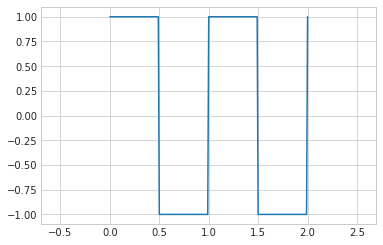

In [25]:
# Square Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.square(2 * np.pi * t)
plt.plot(t, x)
plt.axis('equal')
plt.show()
# This maybe represent the direction of the pendulum, 1 of moving left and -1 for moving right.

(-0.1, 2.1, -1.099, 1.0790000000000002)

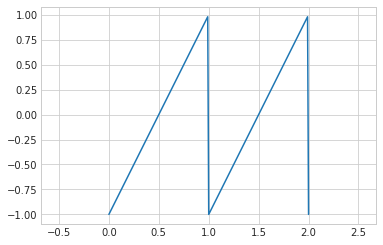

In [26]:
# sawtooth Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.sawtooth(2 * np.pi * t)
plt.plot(t, x)
plt.axis('equal')

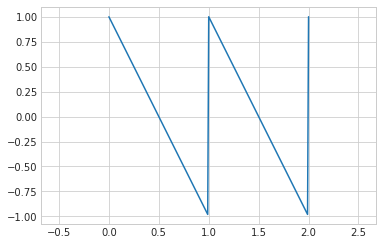

In [27]:
# sawtooth Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.sawtooth(2 * np.pi * t, width=0)
plt.plot(t, x)
plt.axis('equal')
plt.show()

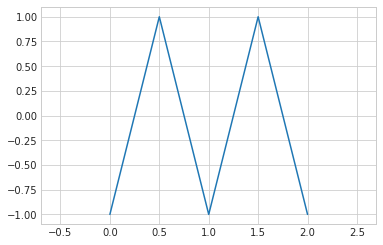

In [28]:
# Triangle Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.sawtooth(2 * np.pi * t, width=0.5)
plt.plot(t, x)
plt.axis('equal')
plt.show()

These are the basic wave form that you should know.

Now, the fun is, most of the signals can be constructed from multiple sine/cosine wave.
For example, the square wave.

$$
x(t) = \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{1}{2 k - 1} \sin \left( 2 \pi \left(2 k - 1 \right) t \right)
$$


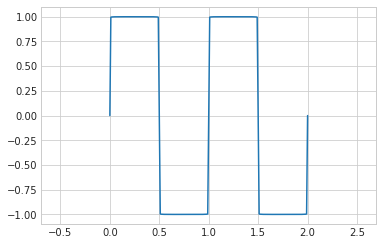

In [29]:
t = np.arange(0,2 + 1/100, 1/100)
x = np.zeros(len(t))
for i in np.arange(1,2000,2):
    x += 4/(np.pi*i) * np.sin(2 * np.pi * t * i)
plt.plot(t, x)
plt.axis('equal')
plt.show()

While the square is the sum of odd-integer frequency sine waves, the Sawtooth wave is all integer with some adjustment.

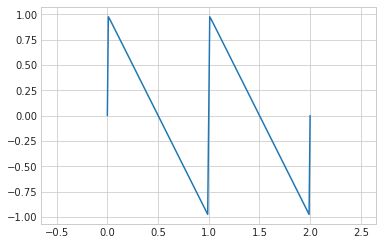

In [30]:
t = np.arange(0,2 + 1/100, 1/100)
x = np.zeros(len(t))
for i in np.arange(1,2000):
    x += -1**i * np.sin(2 * np.pi * t * i) / i
plt.plot(t, 2/(np.pi) * x * -1)
plt.axis('equal')
plt.show()

This is fun. Let's try triangle

$$ x_\mathrm{triangle}(t) = \frac8{\pi^2}\sum_{i=0}^{N - 1} (-1)^i n^{-2} \sin(2\pi f_0 n t) $$

where $n = 2i+1$

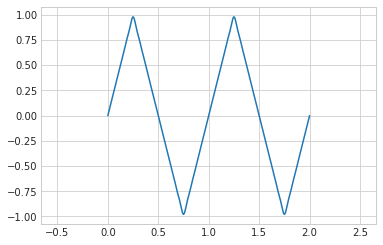

In [31]:
t = np.arange(0,2 + 1/100, 1/100)
x = np.zeros(len(t))
for i in np.arange(0,10,1):
    n = (2*i) + 1
    x += ((-1)**i)  * (1/(n**2)) * np.sin(2 * np.pi * t * n)
plt.plot(t, 8 * x / np.pi**2)
plt.axis('equal')
plt.show()

What does this mean? In the end, any periodic signal can be deconstructed into multiple sine/cosine wave.

This is the basis of Fourier Series and Fourier Transform.

## 3. Analog and Digital signal

One final basic of signal processing is digitizing the signal. For you, who are an audiophile nerd, you may recall to this process as a Digital-to-Analog Convertion (DAC). 

Now, you have to up your imagination game. When you see a graph of time, you have to see a motion.

![alt](https://i.gifer.com/7myU.gif)

Thus, a signal is strongly correlated to time. When we talk about signal, we talk about an event in a range of time not a point of time. This means when you are recording a signal, you are recording multiple data points mostly in an array format. 

If you still don't get the idea, then here are some example.

What is a video? A series of picture. 1 frame of a video is a picture.

Why do we recognize a motion in a video? Because the subject in the video is moving. 

Why do we know the subject is moving? Because the position of the subject changes throughout the video. 

Still don't get it? Look at the picture below and guess which direction does the left pendulum is moving?

![alt](https://www.markhamlawfirm.com/wp-content/uploads/2016/08/The-Pendulum-Begins-to-Swing-Back.jpg)

The answer is, I don't know. I copy the picture from the internet. The answer of left or right is not relevant because if the information is sufficient, everyone will know which direction it's moving toward.


To complete this, the order of the information is important. If I give you unordered images from the pendulum GIF and asked you to rearrange in the correct order, you will most likely fail.

![alt](https://c.tenor.com/ZDQm6tcyVooAAAAC/simple-pendulum-pendulum.gif)

The topic we are discussing so far is `sampling`.

### 3.1 Sampling

[quote](https://en.wikipedia.org/wiki/Sampling_(signal_processing))
>In signal processing, sampling is the reduction of a continuous-time signal to a discrete-time signal. A common example is the conversion of a sound wave to a sequence of "samples". A sample is a value of the signal at a point in time and/or space; this definition differs from the usage in statistics, which refers to a set of such values.[A]
>
>A sampler is a subsystem or operation that extracts samples from a continuous signal. A theoretical ideal sampler produces samples equivalent to the instantaneous value of the continuous signal at the desired points.
>
>The original signal can be reconstructed from a sequence of samples, up to the `Nyquist limit`, by passing the sequence of samples through a type of low-pass filter called a reconstruction filter.

#### My take
What is *sample*? If you produce a laptop and want to perform a QC, you randomly pick laptops from the entire warehouse and check the product. The entire warehouse is *population* and the randomly-pick laptops is *sample*. Sampling is the process to get the samples. 

Is the randomly select laptops really is random? Out of 100 laptops, can we pick 1, 2, and 3 for the QC? Is it better to select 25, 50, and 75? 

The key of sampling is to select samples that represent the population. In a nerdy word, the distribution of samples is the same as population.

How does this relevant to signal sampling?

Remember, signal is a continuous data, and we want to record this data into a computer which is digital, AKA discrete. If you still don't get the problem then here is the problem. In one minute, how many second are there? 60 seconds. Is second the smallest unit we can have? No. Okay, then we go further. In one second, how many millisecond are there? 1000 milliseconds. Good. Can we go further? Absolutely! But when do we stop? At microsecond? At picosecond? 

You see, there is no stop. In the continuous data, you can always find the smaller step. 

"But, previously we saw the sine wave. It is nice and smooth. Clearly, it is continuous." No. In digital world, when the data is so real, we say high-resolution (high-res).

Here is what the sine wave really is.

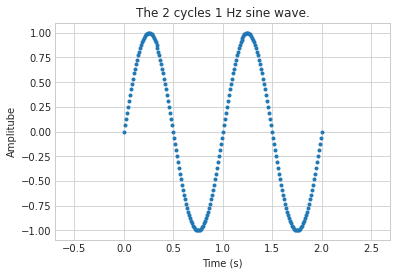

This digital sine wave has a sample size of 201 points.


In [37]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
# plt.plot(t,x_sin)
plt.scatter(t,x_sin, marker='.')
plt.title("The 2 cycles 1 Hz sine wave.")
plt.xlabel('Time (s)')
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.show()

print(f"This digital sine wave has a sample size of {len(x_sin)} points.")

If you still don't get this, here is another example.

We already know a video is a series of pictures. In the real world, actors movement is continuous. When you take a picture, you create one sample/frame. To recreate the movement, a series of pictures is taken, AKA recording a video. A video frame rate is the number of pictures/frames recorded in one second. If you record a video with 30 frame rate, the camera captures the frame at the interval of 1/30 second. When it plays back, it creates an illusion of movement. Fun fact, the movie usually records at 23.97 or 24 frames per second. This frame rate gives the blur to the movement that create the realistic feeling to the audience. 60 and beyond is too smooth to be true, psychologically.

![alt](https://csgopedia.com/uploads/blog/see%20fps/gif.gif)

In summary, `sampling` (in signal processing) is the process to record the continuous data into discrete data that can reconstruct back to the continuous data. Normally, the process is happened at a fix interval (sampling rate (Hz)).

If you still confuse, you have to see me after class.

### 3.2 Nyquist Frequency

[quote](https://en.wikipedia.org/wiki/Nyquist_frequency)
> In signal processing, the Nyquist frequency (or folding frequency), named after Harry Nyquist, is a characteristic of a sampler, which converts a continuous function or signal into a discrete sequence. In units of cycles per second (Hz), its value is one-half of the sampling rate (samples per second).[1][2][A] When the highest frequency (bandwidth) of a signal is less than the Nyquist frequency of the sampler, the resulting discrete-time sequence is said to be free of the distortion known as aliasing, and the corresponding sample rate is said to be above the Nyquist rate for that particular signal.[3][4]

[quote](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)
> The Nyquist–Shannon sampling theorem is a theorem in the field of signal processing which serves as a fundamental bridge between continuous-time signals and discrete-time signals. It establishes a sufficient condition for a sample rate that permits a discrete sequence of samples to capture all the information from a continuous-time signal of finite bandwidth.
>
> Strictly speaking, the theorem only applies to a class of mathematical functions having a Fourier transform that is zero outside of a finite region of frequencies. Intuitively we expect that when one reduces a continuous function to a discrete sequence and interpolates back to a continuous function, the fidelity of the result depends on the density (or sample rate) of the original samples. The sampling theorem introduces the concept of a sample rate that is sufficient for perfect fidelity for the class of functions that are band-limited to a given bandwidth, such that no actual information is lost in the sampling process. It expresses the sufficient sample rate in terms of the bandwidth for the class of functions. The theorem also leads to a formula for perfectly reconstructing the original continuous-time function from the samples.

Ok. now we know what is sampling and why it is important, is this mean we just record the continuous data with the highest resolution we can? That mean the discrete data we recorded is as close as the continuous data. End of the story. Let's go to the next topic.

Well, in some case, yes. In practice, ummm.. maybe. Here is why.

1. When you record more data, the data is larger. You need more storage.
2. When the data is big, you need more processing power.

When we are an engineer, we seek for the "good enough". Later, if you feel luxurious, you can go beyond "good enough". At that point, go luxurious is a choice (you make a decision with reason like an engineer).

What is "good enough"? It is a bare minimum of acceptable. If lower than this, it will not work.

Now, let's see the example.

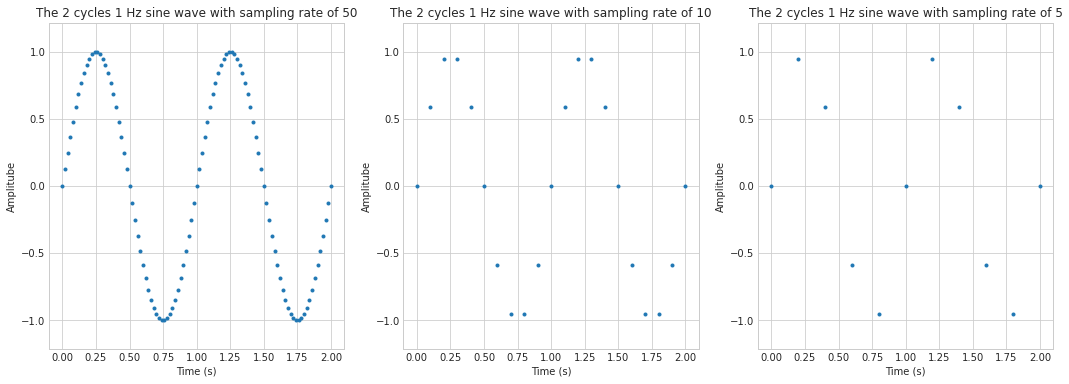

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sampling_rates = [50,10,5]
for i in range(3):
    sampling_rate = sampling_rates[i]
    t = np.arange(0,2 + 1/sampling_rate,1/sampling_rate)
    x_sin = np.sin((2 * np.pi * t) + 0)
    ax[i].scatter(t,x_sin, marker='.')
    ax[i].set_title(f"The 2 cycles 1 Hz sine wave with sampling rate of {sampling_rate}")
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitube')
    ax[i].axis('equal')

plt.show()

From the above figures, you can see when we reduce the sampling rate, we have fewer data points. In the same 2 seconds span, the density of data is reduced. 

However, the 5 Hz sampling is still, somewhat look like a 2-cycle of 1 Hz sine wave. This is ok.

Let's reduce the number of sampling rate.

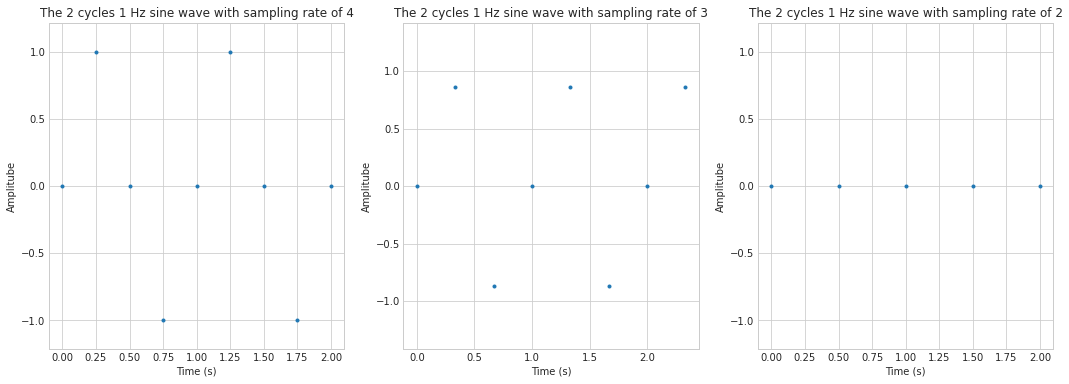

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sampling_rates = [4,3,2]
for i in range(3):
    sampling_rate = sampling_rates[i]
    t = np.arange(0,2 + 1/sampling_rate,1/sampling_rate)
    x_sin = np.sin((2 * np.pi * t) + 0)
    ax[i].scatter(t,x_sin, marker='.')
    ax[i].set_title(f"The 2 cycles 1 Hz sine wave with sampling rate of {sampling_rate}")
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitube')
    ax[i].axis('equal')

plt.show()

Oh no, the 2 Hz sampling rate gives us a flat line. Clearly, this won't work. You are half correct. Let's shift the phase a bit.

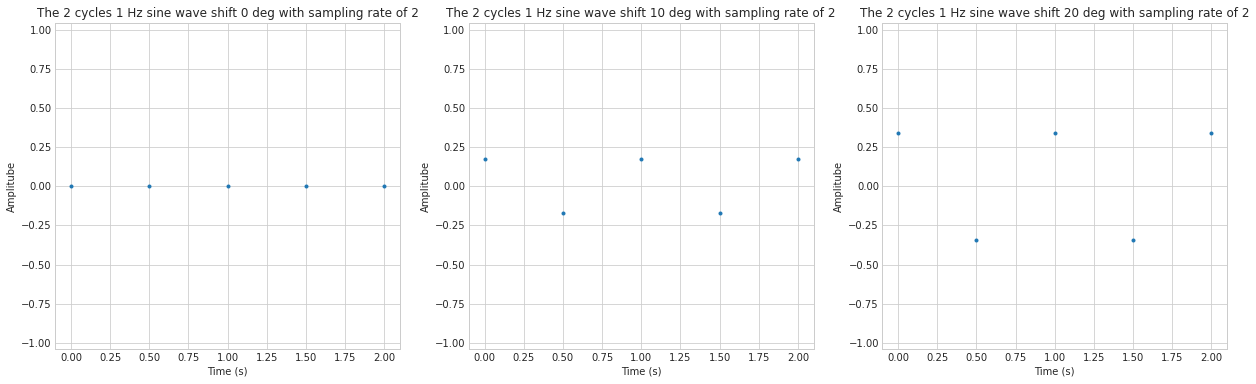

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21,6))

sampling_rates = [2,2,2]
phases = [0, 10, 20]
for i in range(3):
    sampling_rate = sampling_rates[i]
    phase = phases[i]
    t = np.arange(0,2 + 1/sampling_rate,1/sampling_rate)
    x_sin = np.sin((2 * np.pi * t) + np.deg2rad(phase))
    ax[i].scatter(t,x_sin, marker='.')
    ax[i].set_title(f"The 2 cycles 1 Hz sine wave shift {phase} deg with sampling rate of {sampling_rate}")
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitube')
    ax[i].axis('equal')

plt.show()

Here you see, the issue is mitigated when the phase is shifted. In the shifted sine wave, the record is captured the 1 Hz wave but not its original amplitude.

Now, let's go lower.

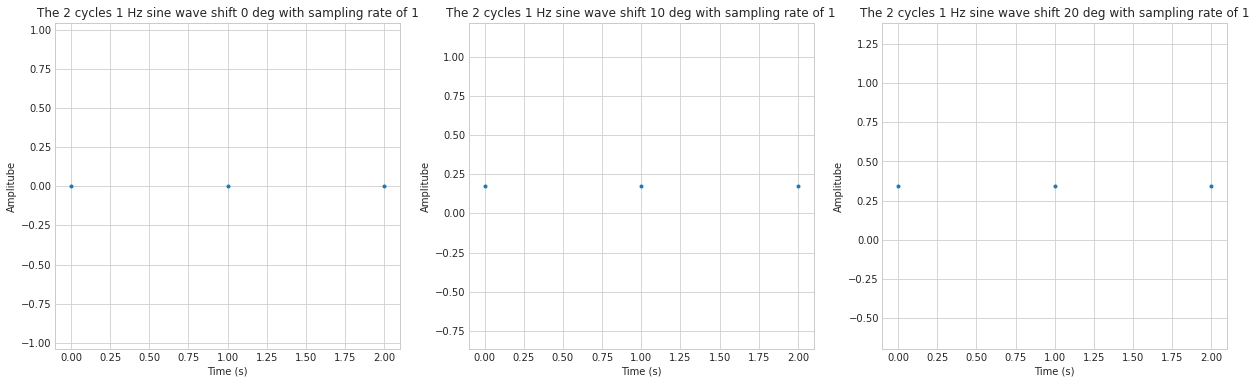

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21,6))

sampling_rates = [1,1,1]
phases = [0, 10, 20]
for i in range(3):
    sampling_rate = sampling_rates[i]
    phase = phases[i]
    t = np.arange(0,2 + 1/sampling_rate,1/sampling_rate)
    x_sin = np.sin((2 * np.pi * t) + np.deg2rad(phase))
    ax[i].scatter(t,x_sin, marker='.')
    ax[i].set_title(f"The 2 cycles 1 Hz sine wave shift {phase} deg with sampling rate of {sampling_rate}")
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitube')
    ax[i].axis('equal')

plt.show()

With the sampling rate of 1 Hz, the sampling frequency matches the signal frequency. Therefore, every sample is 1 cycle apart. 

This is different from 2 Hz 0 degree configuration because, in that configuration, the even samples have a phase of 0 and even samples have a phase of 180. We can say we are unlucky because if we shift the sine wave a bit, we will not get a flat line. In fact, only sine wave with 0 and 180 degree shifted will yield a flat line.

While there is more knowledge to the `Nyquist frequency`, the essential is you can only preserve the frequency content below the half of the sampling rate. 

When we record 1 Hz sine wave, the "good enough" sampling rate is 2 Hz.

When we record 10 Hz sine wave, the "good enough" sampling rate is 20 Hz.

When we record 100 Hz sine wave, the "good enough" sampling rate is 200 Hz.


Fun fact, the human hearing is in the range of 20 to 20,000 Hz. The CD quality has a sampling rate of 44,100 Hz.
Why not 40,000 Hz? Read [here](https://en.wikipedia.org/wiki/44,100_Hz)

### 3.3 Simulating a sine wave

We discuss this much so that finally you can understand what is about to happen next, simulating a sine wave.

In fact, you have seen the simulation throughout this file. Now, it is the right time to explain the code.

First, we look at the sine wave equation again.

$$ x(t) = A sin(2 \pi f t + \lambda) $$

Let's recall the parameter.

- **x** is a signal which is a function of time.
- **t** is time.
- **A** is amplitude. (the difference between a mean and a peak)
- **f** is frequncy (Hz)
- $\lambda$ is phase.

The meaning of this equation is, predicting the position of the observed object at time *t* that moves in a motion of sine wave at the rate of *f* Hz and start (t=0) at phase $\lambda$ with amplitude *A*.

/root/projects/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Attempting to set identical left == right == 0.5 results in singular transformations; automatically expanding.
  fig.canvas.print_figure(bytes_io, **kw)


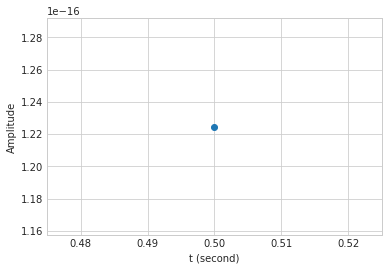

In [62]:
t = 0.5 # second
A = 1 # amplitude
f = 1 # Hz
phase = 0
x = A * np.sin(2 * np.pi * f * t + phase)

plt.scatter(t,x)
plt.xlabel('t (second)')
plt.ylabel('Amplitude')
plt.axis('equal')
plt.show()

To predict multiple points, we use the numpy broadcasting technique.

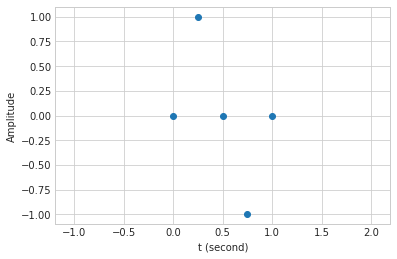

In [64]:
t = np.array([0,0.25,0.5,0.75,1]) # second
A = 1 # amplitude
f = 1 # Hz
phase = 0
x = A * np.sin(2 * np.pi * f * t + phase)

plt.scatter(t,x)
plt.xlabel('t (second)')
plt.ylabel('Amplitude')
plt.axis('equal')
plt.show()

Manually creating an array of time is not fun. Here you can use `np.arange` or `np.linspace` function

In [65]:
np.arange(start=0,stop=1,step=1/100)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [68]:
np.linspace(start=0, stop=1, num=100, endpoint=False)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

The above two arrays are actually is an interval of sampling. The meaning is we will look/predict the sine wave at the interval of 1/100 starting from second 0 to 1. 

Sometime, defining the sampling rate/frequency is easier. Here is how.

In [69]:
fs = 100 #Hz
np.arange(start=0,stop=1,step=1/fs)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

Put it together.

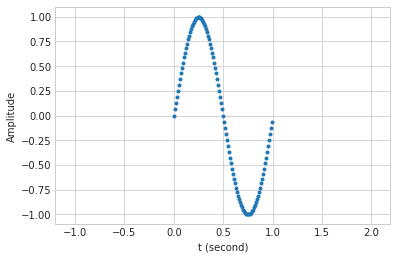

In [72]:
fs = 100 #Hz
t = np.arange(start=0,stop=1,step=1/fs)
A = 1 # amplitude
f = 1 # Hz
phase = 0
x = A * np.sin(2 * np.pi * f * t + phase)

plt.scatter(t,x, marker='.')
plt.xlabel('t (second)')
plt.ylabel('Amplitude')
plt.axis('equal')
plt.show()

If you look closely, the last point does not end at (1,0) or it does not reach t = 1 second. This is because the array *t* ends at 0.99.

It is common to see `stop=1+(1/fs)` in the `arange` function to add the final data point that repeat the first one.

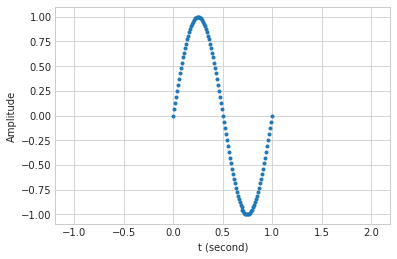

In [74]:
fs = 100 #Hz
t = np.arange(start=0,stop=1 + (1/fs),step=1/fs)
A = 1 # amplitude
f = 1 # Hz
phase = 0
x = A * np.sin(2 * np.pi * f * t + phase)

plt.scatter(t,x, marker='.')
plt.xlabel('t (second)')
plt.ylabel('Amplitude')
plt.axis('equal')
plt.show()

Now, you understand the basic of signal.

Next, we discuss how to analyze any arbitrary signals using the knowledge we established in this file.